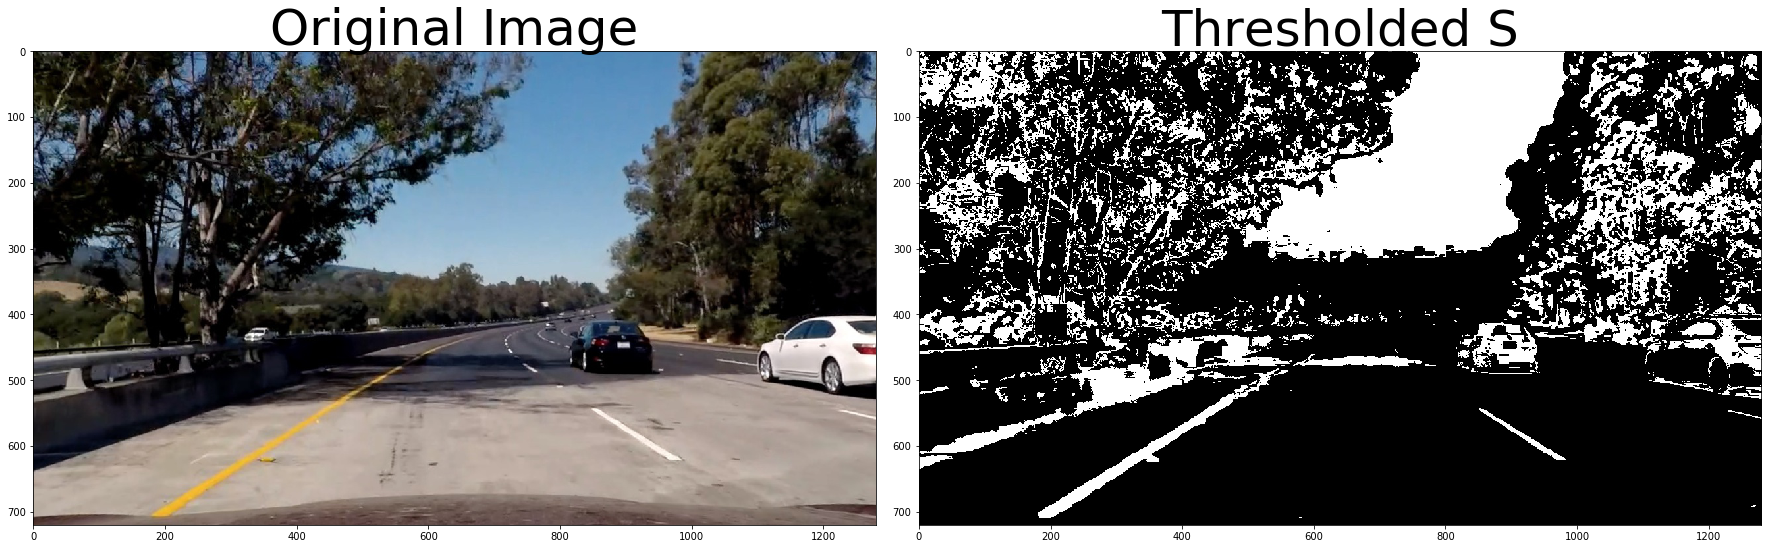

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in an image, you can also try test1.jpg or test4.jpg
#image = mpimg.imread('colorspace_test_images/test6.jpg') 
image = mpimg.imread('bridge_shadow.jpg')

# TODO: Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    # 2) Apply a threshold to the S channel
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    #binary[(L > 200)] = 1

    # 3) Return a binary image of threshold result
    #binary_output = np.copy(img) # placeholder line
    return binary
    
# Optional TODO - tune the threshold to try to match the above image!    
hls_binary = hls_select(image, thresh=(90, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

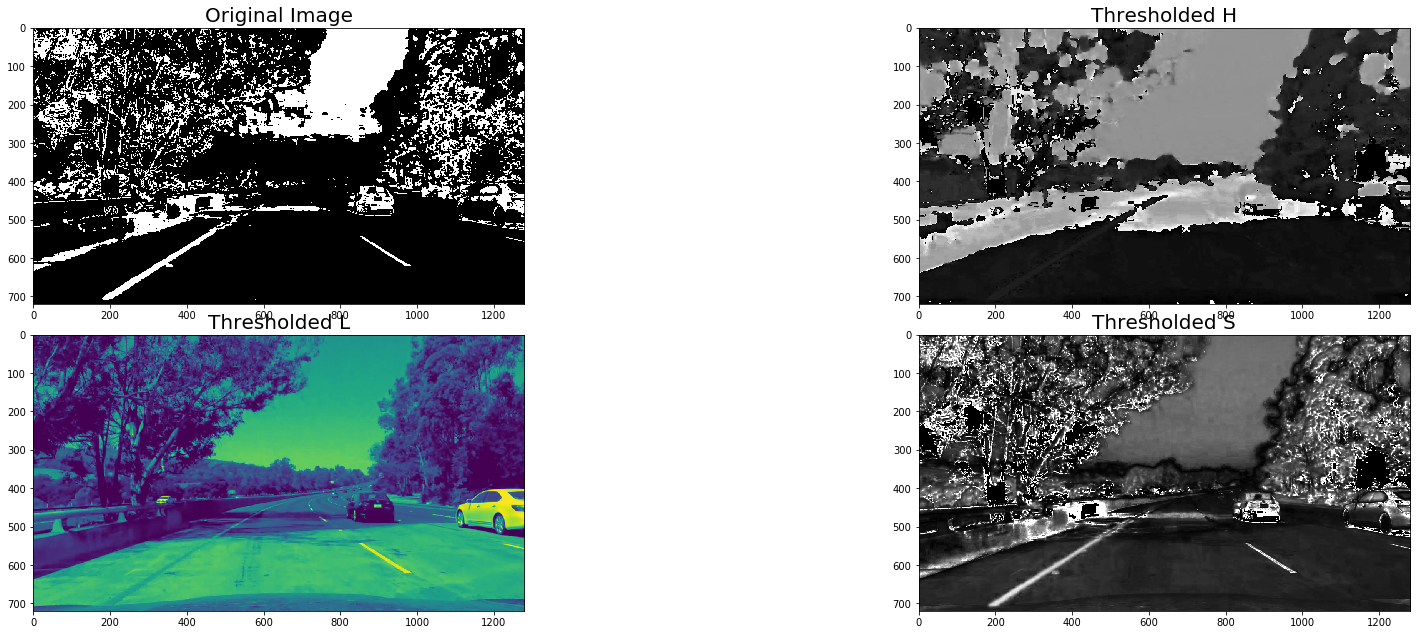

In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in an image, you can also try test1.jpg or test4.jpg
#image = mpimg.imread('colorspace_test_images/test6.jpg') 
image = mpimg.imread('bridge_shadow.jpg')

# TODO: Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    # 2) Apply a threshold to the S channel
    binary = np.zeros_like(S)
    H[(S > thresh[0]) & (S <= thresh[1])] 
    L[(S > thresh[0]) & (S <= thresh[1])] 
    S[(S > thresh[0]) & (S <= thresh[1])] 
    a=(S > thresh[0]) & (S <= thresh[1]);
    #binary[(L > 200)] = 1

    # 3) Return a binary image of threshold result
    #binary_output = np.copy(img) # placeholder line
    return H, L, S, a
    
# Optional TODO - tune the threshold to try to match the above image!    
H, L, S, a = hls_select(image, thresh=(100, 255))

# Plot the result
f, ax = plt.subplots(2, 2, figsize=(24, 9))
f.tight_layout()
ax[0,0].imshow(a,cmap='gray')
ax[0,0].set_title('Original Image', fontsize=20)
ax[0,1].imshow(H, cmap='gray')
ax[0,1].set_title('Thresholded H', fontsize=20)
ax[1,0].imshow(L)
ax[1,0].set_title('Thresholded L', fontsize=20)
ax[1,1].imshow(S, cmap='gray')
ax[1,1].set_title('Thresholded S', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [70]:
a

array([[False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

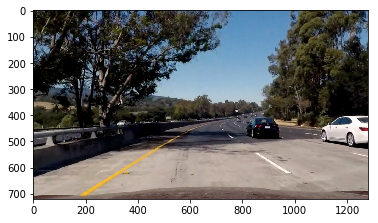

In [58]:
def advance_combo(img, sx_thresh=(20, 200), s_thresh=(120,255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] 

# Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] 
    
# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

# Combine the two binary thresholds
    #combined_binary = np.zeros_like(sxbinary)
    #combined_binary[s_binary >0] = 1
    #combined_binary[sxbinary >0]
    return sxbinary
image = mpimg.imread('bridge_shadow.jpg')
plt.imshow(image)

In [2]:
# Define a function that thresholds the S-channel of HLS
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

hls_binary = hls_select(image, thresh=(90, 255))